In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/jessi/Downloads/titanic-passengers.csv", sep=";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
df["Survived"]=df["Survived"].map({"Yes":0, "No":1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,1,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,1,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,1,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,1,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,1,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x=df['Survived'].values.reshape(-1,1)
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=741)


In [5]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)  
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=741)
y_pred  = logreg.predict(x_test) 
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=1.00


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

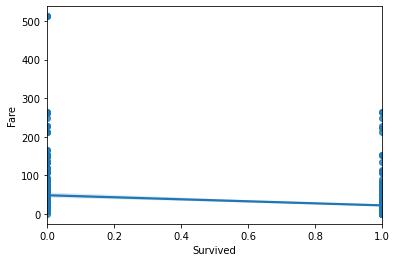

In [6]:
sns.regplot(x='Survived',y='Fare',data=df)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

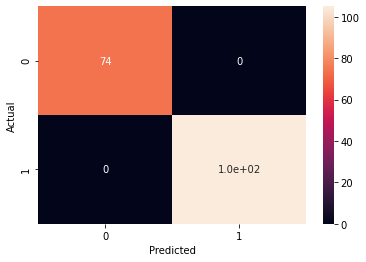

In [7]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

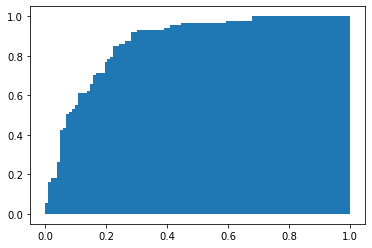

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

x,y= make_classification(n_samples=950, n_classes=2, n_features=10, random_state=741)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=741)

logreg1=logreg.fit(x_train,y_train)
logreg2=logreg.fit(x_train,y_train)

pred_prob1=logreg1.predict_proba(x_test)
pred_prob2=logreg2.predict_proba(x_test)

from sklearn.metrics import roc_curve

fpr1,tpr1,tresh1=roc_curve(y_test,pred_prob1[:,1],pos_label=1)
fpr2,tpr2,tresh2=roc_curve(y_test,pred_prob2[:,1],pos_label=1)

random_probs= [0 for i in range (len(y_test))]
p_fpr, p_tpr,_=roc_curve(y_test,random_probs,pos_label=1)
plt.fill_between(fpr1,tpr1)

In [9]:
from sklearn.metrics import roc_auc_score

auc_score1=roc_auc_score(y_test,pred_prob1[:,1])
auc_score2=roc_auc_score(y_test,pred_prob2[:,1])

print(auc_score1, auc_score2)

0.8686530521147194 0.8686530521147194
